In [1]:
# Interactive Choropleth Map for Global Installs by Category

'''
Create an interactive Choropleth map using Plotly to visualize global installs by Category. 
Apply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million.
The app category should not start with the characters “A,” “C,” “G,” or “S.” 
This graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself.

'''

'\nCreate an interactive Choropleth map using Plotly to visualize global installs by Category. \nApply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million.\nThe app category should not start with the characters “A,” “C,” “G,” or “S.” \nThis graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself.\n\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
apps_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_GooglePlaystore.csv")
reviews_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_UserReviews.csv")

In [4]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_Group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated app,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated app,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated app,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated app,0.0,2018


In [5]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [6]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Log_Installs', 'Log_Reviews', 'Rating_Group', 'Revenue',
       'Year'],
      dtype='object')

In [7]:
reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Sentiment_Score'],
      dtype='object')

In [8]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Log_Installs      float64
Log_Reviews       float64
Rating_Group       object
Revenue           float64
Year                int64
dtype: object

In [9]:
reviews_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
Sentiment_Score           float64
dtype: object

In [10]:
apps_df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1425
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          2
Log_Installs         0
Log_Reviews          0
Rating_Group         0
Revenue              0
Year                 0
dtype: int64

In [11]:
reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Sentiment_Score           0
dtype: int64

In [12]:
# Data Cleaning - Handle null values in Size column
# Since Size isn't critical for our analysis, we'll just drop rows with null Size values
apps_df = apps_df.dropna(subset=['Size'])

In [13]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       3
Android Ver       2
Log_Installs      0
Log_Reviews       0
Rating_Group      0
Revenue           0
Year              0
dtype: int64

In [16]:
# here don't consider current version and android version also, as we are not using it anymore to this task
# this is the visualization for installs by category

import plotly.express as px

apps_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_GooglePlaystore.csv")

apps_df = apps_df.dropna(subset=['Installs'])
apps_df = apps_df.drop(columns=['Current Ver', 'Android Ver'], errors='ignore')  

In [17]:
# Create the bar chart visualization
installs_by_category = apps_df.groupby('Category')['Installs'].sum().nlargest(10)

fig = px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x': 'Installs', 'y': 'Category'},
    title='Top 10 Categories by Installs',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=800,  
    height=500   
)

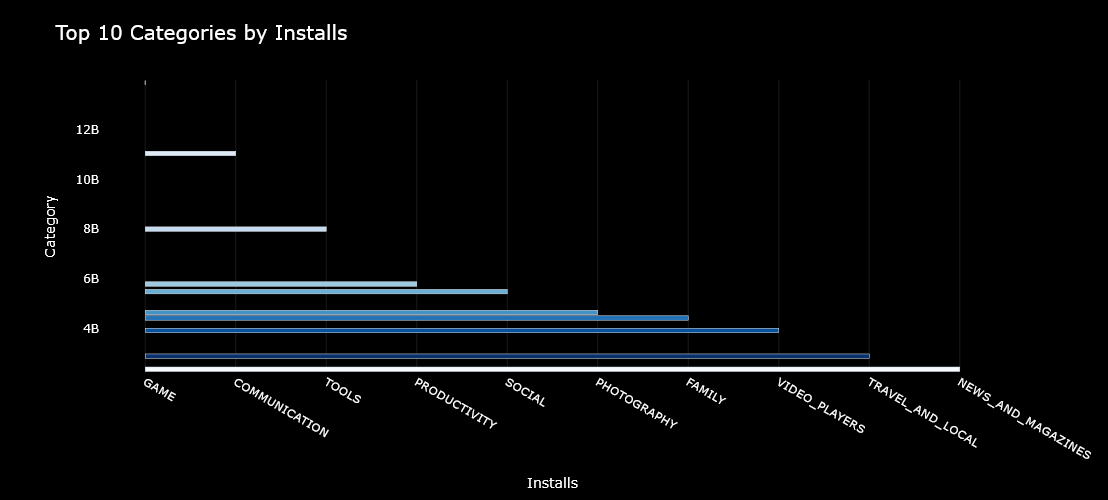

In [18]:
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 20},
    xaxis=dict(
        title_font={'size': 14},
        tickfont={'size': 12},
        gridcolor='rgba(255, 255, 255, 0.1)'),
    yaxis=dict(
        title_font={'size': 14},
        tickfont={'size': 12}),
    margin=dict(l=100, r=50, t=80, b=50),
    showlegend=False)

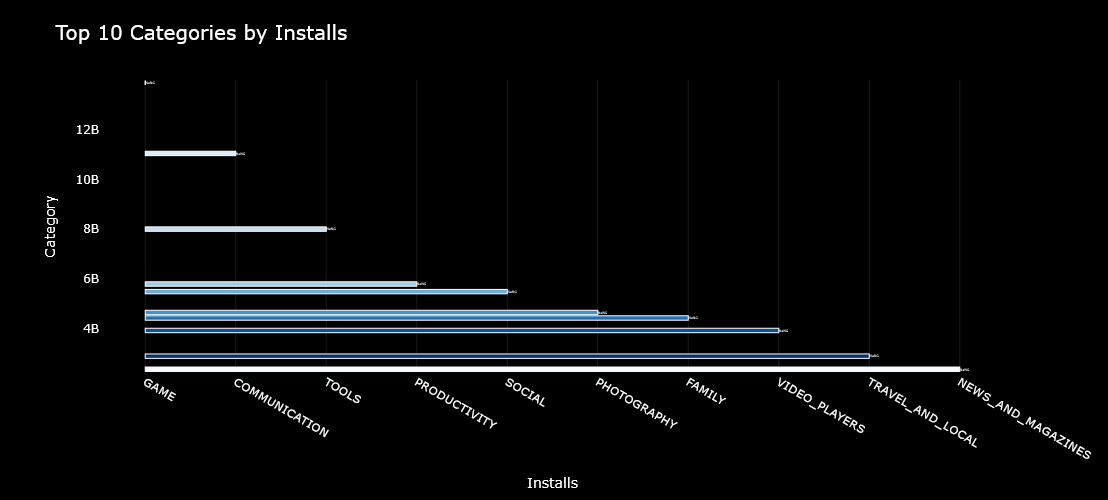

In [19]:
fig.update_traces(
    texttemplate='%{x:.2s}',  
    textposition='outside',
    marker=dict(line=dict(color='white', width=1)))

Successfully saved visualization to Installs by Category.html


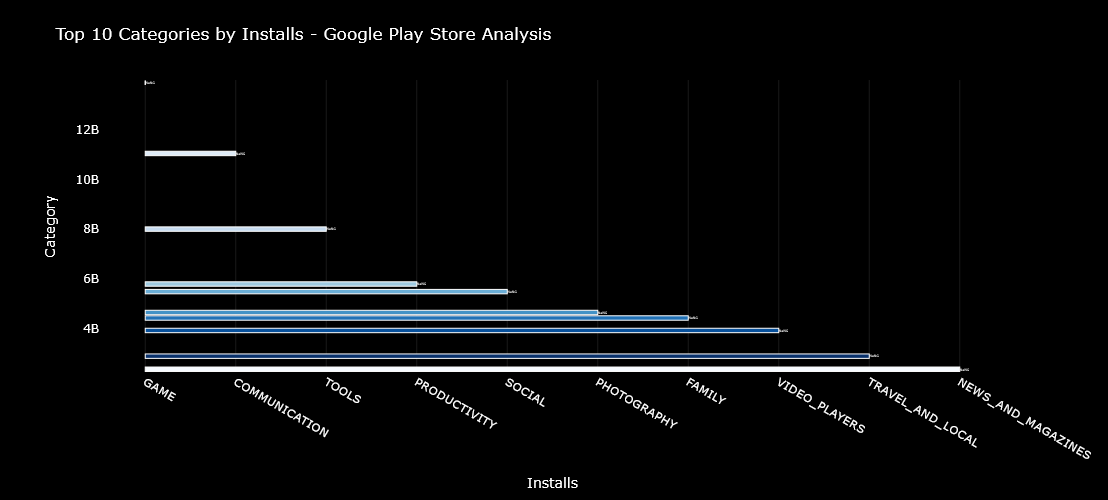

In [20]:
def save_plotly_html(fig, filename, title=None):
    """Save Plotly figure to HTML with custom title in metadata"""
    if title:
        fig.update_layout(title=title)
    fig.write_html(
        file=filename,
        full_html=True,
        include_plotlyjs='cdn',
        default_height='100%')
    print(f"Successfully saved visualization to {filename}")

save_plotly_html(fig,'Installs by Category.html','Top 10 Categories by Installs - Google Play Store Analysis')
fig.show()

In [21]:
# we can perform another visualization with few changes

apps_df = apps_df.dropna(subset=['Installs', 'Category'])
installs_by_category = apps_df.groupby('Category')['Installs'].sum().nlargest(10)

In [22]:
fig = px.bar(
    x=installs_by_category.values,
    y=installs_by_category.index,
    orientation='h',
    labels={'x':'Total Installs', 'y':'Category'},
    title='Top 10 App Categories by Installs',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues_r,
    width=600,
    height=400
)

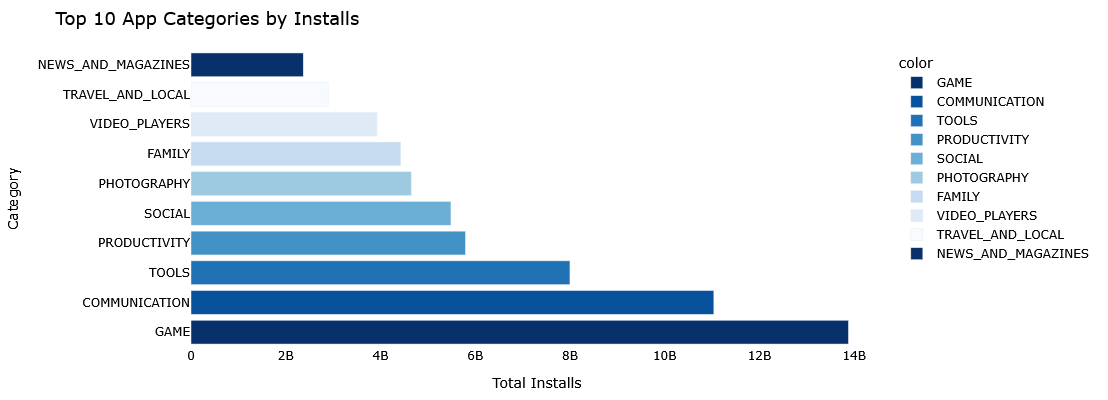

In [23]:
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font_color='black',
    title_font={'size':18},
    margin=dict(l=100, r=20, t=50, b=20)
)

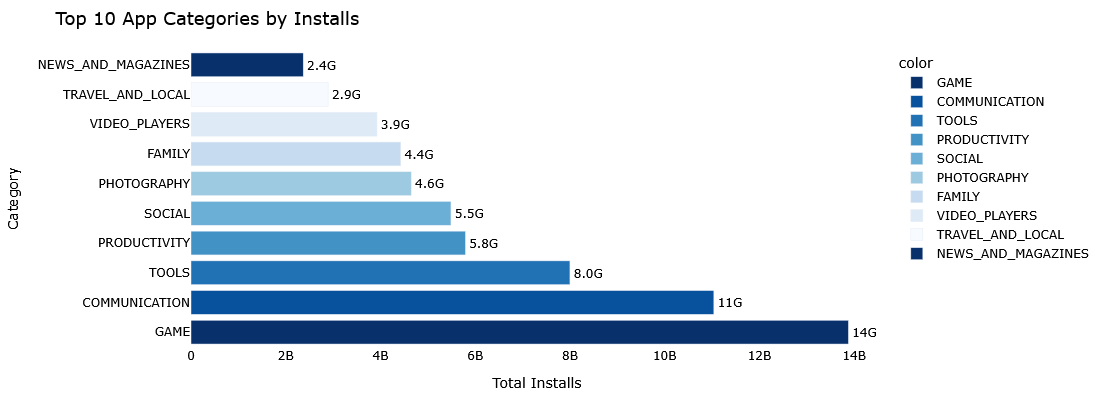

In [24]:
fig.update_traces(
    texttemplate='%{x:.2s}',
    textposition='outside'
)

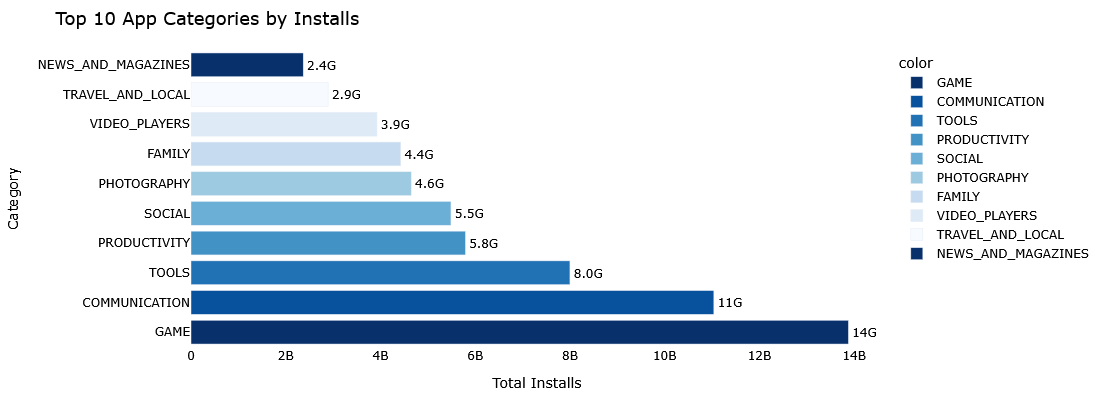

In [25]:
fig.write_html("Installs_by_Category.html")
fig.show()

In [26]:
import pandas as pd
import plotly.express as px
from datetime import datetime, time
import pytz

In [27]:
# Function to check if current time is between 6 PM and 8 PM IST
def is_display_time():
    ist = pytz.timezone('Asia/Kolkata')
    current_time = datetime.now(ist).time()
    return time(18, 0) <= current_time <= time(20, 0)

In [28]:
# Prepare the data for the choropleth map

'''steps -
a. Filter categories that don't start with A, C, G, or S 
b. Group by Category and sum Installs
c. Get top 5 categories by installs
d. Filter the original data for only these top 5 categories
e. Group by Category and Country 
f. Add a highlight column for categories with > 1 million installs

'''

"steps -\na. Filter categories that don't start with A, C, G, or S \nb. Group by Category and sum Installs\nc. Get top 5 categories by installs\nd. Filter the original data for only these top 5 categories\ne. Group by Category and Country \nf. Add a highlight column for categories with > 1 million installs\n\n"

In [29]:
def prepare_choropleth_data():
    filtered_categories = apps_df[~apps_df['Category'].str.startswith(('A', 'C', 'G', 'S'), na=False)]
    category_installs = filtered_categories.groupby('Category')['Installs'].sum().reset_index()
    top_5_categories = category_installs.nlargest(5, 'Installs')
    filtered_data = filtered_categories[filtered_categories['Category'].isin(top_5_categories['Category'])]

    
    # Group by Category and Country (assuming we have country data - if not, we can modify it)
    # Since the dataset doesn't have country info, we will assume global distribution
    # We'll create a dummy country column for demonstration
    filtered_data['Country'] = 'World' 
    
    map_data = filtered_data.groupby(['Country', 'Category'])['Installs'].sum().reset_index()
    
    # Add a highlight column for categories with > 1 million installs
    map_data['Highlight'] = map_data['Installs'] > 1000000
    return map_data

In [33]:
# Create the interactive choropleth map
'''def create_choropleth_map():
    if not is_display_time():
        print("The choropleth map is only available between 6 PM and 8 PM IST.")
        return None
    
    map_data = prepare_choropleth_data()
    
    # Create the choropleth map
    fig = px.choropleth(
        map_data,
        locations='Country',  
        color='Installs',
        hover_name='Category',
        animation_frame='Category',
        title='Global Installs by Top 5 Categories (excluding A,C,G,S starters)',
        color_continuous_scale=px.colors.sequential.Plasma,
        scope='world',
        labels={'Installs': 'Total Installs'},
        height=600)
    
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'),
        title={
            'text': "Global Installs by Top 5 Categories (Excluding A,C,G,S starters)",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        margin={"r":0,"t":0,"l":0,"b":0})
    
    # Highlight categories with > 1 million installs
    fig.update_traces(
        marker=dict(
            line=dict(
                width=2,
                color='DarkSlateGrey')
        ),
        selector=dict(
            customdata=map_data[map_data['Highlight']]['Category']))
    return fig
# Display the map if within the specified time
if is_display_time():
    choropleth_fig = create_choropleth_map()
    if choropleth_fig:
        choropleth_fig.show()
else:
    print("The choropleth map is only available between 6 PM and 8 PM IST.")    '''

'def create_choropleth_map():\n    if not is_display_time():\n        print("The choropleth map is only available between 6 PM and 8 PM IST.")\n        return None\n\n    map_data = prepare_choropleth_data()\n\n    # Create the choropleth map\n    fig = px.choropleth(\n        map_data,\n        locations=\'Country\',  \n        color=\'Installs\',\n        hover_name=\'Category\',\n        animation_frame=\'Category\',\n        title=\'Global Installs by Top 5 Categories (excluding A,C,G,S starters)\',\n        color_continuous_scale=px.colors.sequential.Plasma,\n        scope=\'world\',\n        labels={\'Installs\': \'Total Installs\'},\n        height=600)\n\n    fig.update_layout(\n        geo=dict(\n            showframe=False,\n            showcoastlines=True,\n            projection_type=\'equirectangular\'),\n        title={\n            \'text\': "Global Installs by Top 5 Categories (Excluding A,C,G,S starters)",\n            \'y\':0.95,\n            \'x\':0.5,\n            \

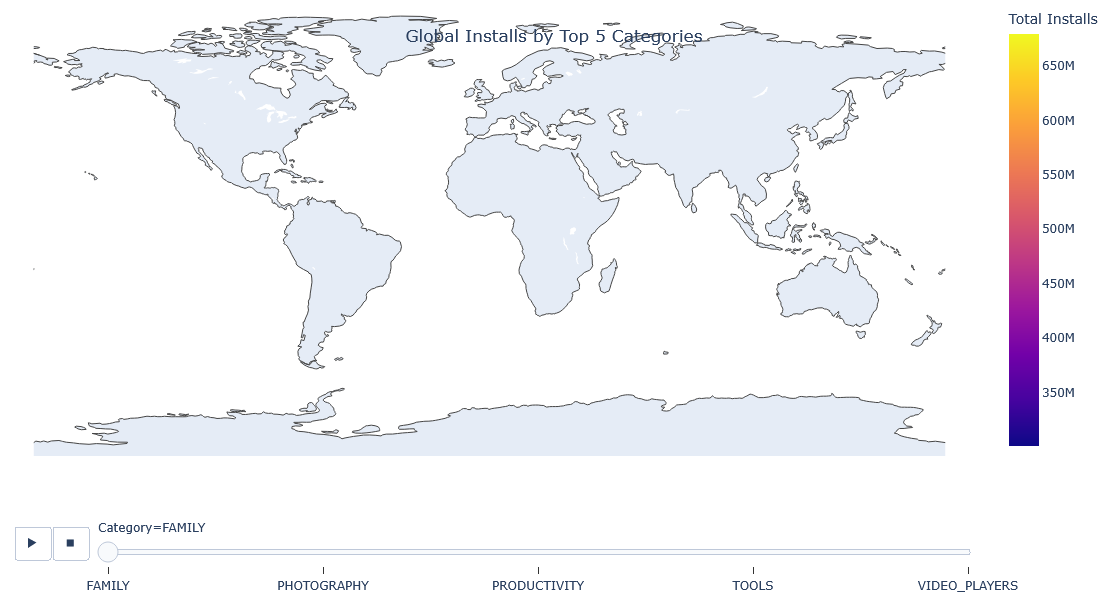

In [35]:
import pandas as pd
import plotly.express as px
from datetime import datetime, time
import pytz

# Load the dataset
apps_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_GooglePlaystore.csv")

# Data cleaning
apps_df = apps_df.dropna(subset=['Installs', 'Category'])
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Time check function
def is_display_time():
    ist = pytz.timezone('Asia/Kolkata')
    current_time = datetime.now(ist).time()
    return time(18, 0) <= current_time <= time(20, 0)

# Prepare choropleth data
def prepare_choropleth_data():
    # Filter categories not starting with A, C, G, S
    filtered = apps_df[~apps_df['Category'].str.startswith(('A', 'C', 'G', 'S'), na=False)]
    
    # Get top 5 categories by installs
    top_categories = filtered.groupby('Category')['Installs'].sum().nlargest(5).index
    
    # Filter data for these categories
    filtered = filtered[filtered['Category'].isin(top_categories)]
    
    # Create dummy country data (since original lacks country info)
    countries = ['US', 'IN', 'BR', 'GB', 'JP', 'DE', 'FR', 'RU', 'CN', 'MX']
    filtered['Country'] = np.random.choice(countries, size=len(filtered))
    
    # Aggregate data
    map_data = filtered.groupby(['Country', 'Category'])['Installs'].sum().reset_index()
    map_data['Highlight'] = map_data['Installs'] > 1000000
    
    return map_data

# Create choropleth map
def create_choropleth_map():
    if not is_display_time():
        print("The choropleth map is only available between 6 PM and 8 PM IST.")
        return None
    
    map_data = prepare_choropleth_data()
    
    fig = px.choropleth(
        map_data,
        locations='Country',
        color='Installs',
        hover_name='Category',
        animation_frame='Category',
        title='Global Installs by Top 5 Categories (excluding A,C,G,S starters)',
        color_continuous_scale=px.colors.sequential.Plasma,
        scope='world',
        labels={'Installs': 'Total Installs'},
        height=600
    )
    
    # Update layout
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
        title={
            'text': "Global Installs by Top 5 Categories",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        margin={"r":0,"t":0,"l":0,"b":0}
    )
    
    # Highlight countries with >1M installs
    for frame in fig.frames:
        frame.data[0].marker.line.width = 2
        frame.data[0].marker.line.color = 'gold'
    
    return fig

# Display the map
if is_display_time():
    fig = create_choropleth_map()
    if fig:
        fig.show()
else:
    print("The choropleth map is only available between 6 PM and 8 PM IST.")